In [1]:

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Importing Liabraries

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 26.4 MB/s eta 0:00:00


In [3]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import yaml
import matplotlib.patches as patches

sns.set_style('darkgrid')

In [4]:
import yaml

# Define the dataset information
dataset_info = {
    'train': '/kaggle/input/sr-det/sat-gen-256x256/train/images',
    'val': '/kaggle/input/sr-det/sat-gen-256x256/val/images',
    'test': '/kaggle/input/sr-det/sat-gen-256x256/test/images',
    'nc': 11,
    'names': ['airplane', 'boat', 'car', 'cargo ship', 'fighter jet', 'helicopter', 'jet', 'military aircraft', 'propeller plane', 'truck', 'yacht']
}

# Create and save the data.yaml file
data_yaml_path = '/kaggle/working/data.yaml'
with open(data_yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_info, yaml_file, default_flow_style=False)

# Data Visualization

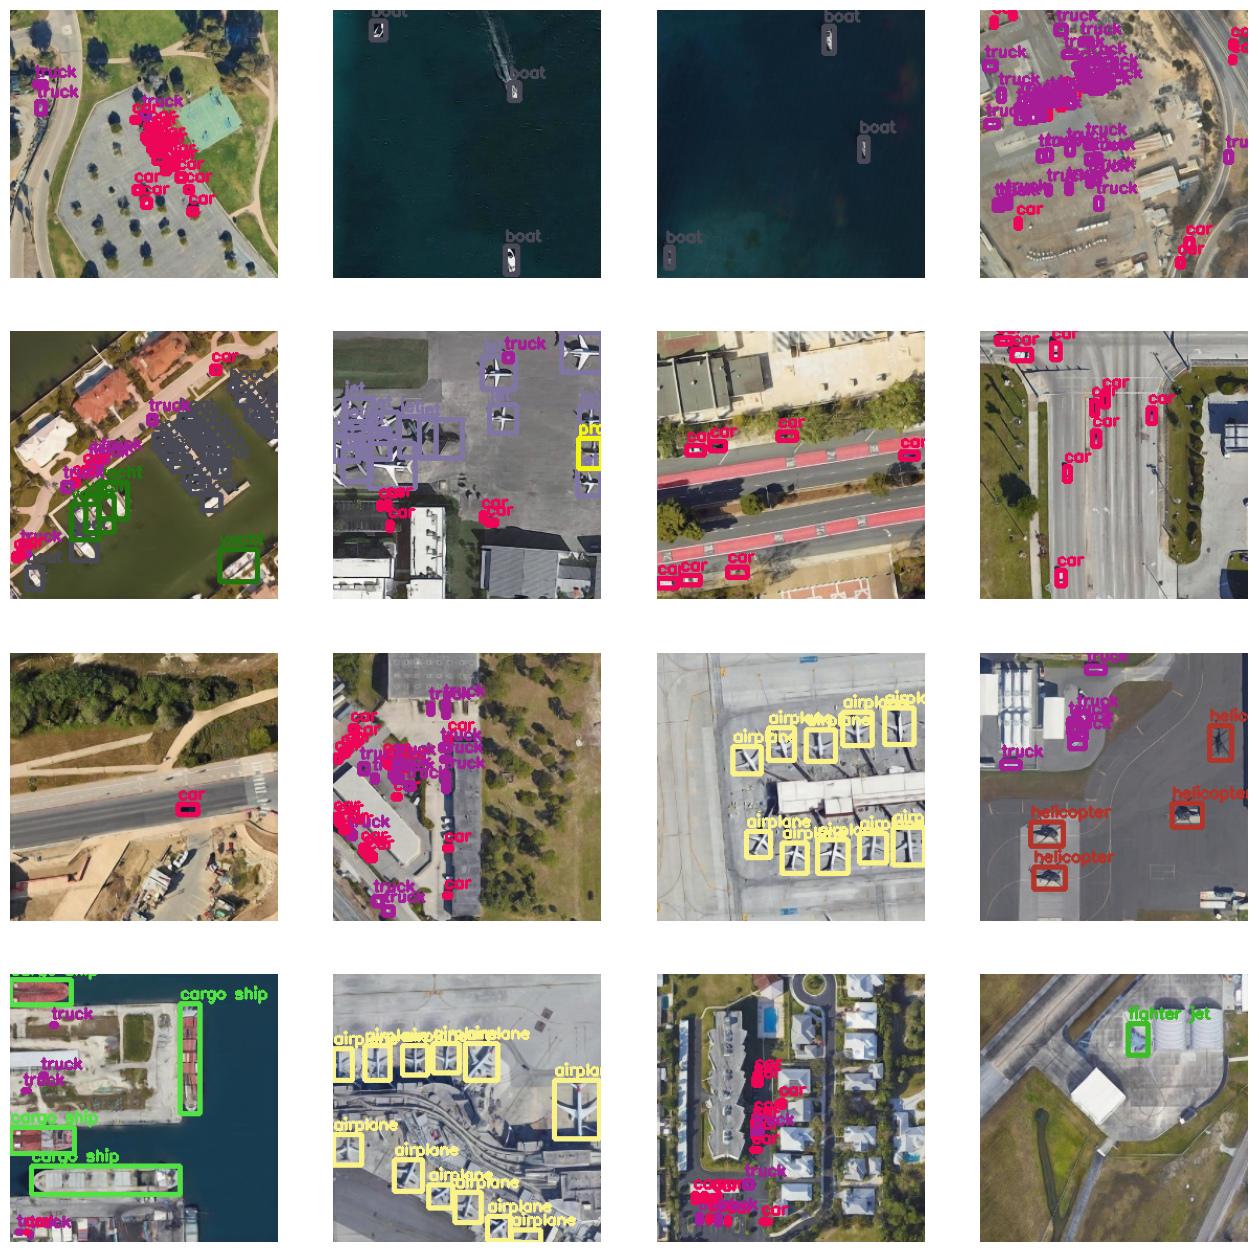

In [5]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/sr-det/sat-gen-256x256/train/images"
train_labels = "/kaggle/input/sr-det/sat-gen-256x256/train/labels"

test_images = "/kaggle/input/sr-det/sat-gen-256x256/test/images"
test_labels = "/kaggle/input/sr-det/sat-gen-256x256/test/labels"

val_images = "/kaggle/input/sr-det/sat-gen-256x256/val/images"
val_labels = "/kaggle/input/sr-det/sat-gen-256x256/val/labels"

# Load class information from the YAML file
yaml_path = '/kaggle/working/data.yaml'
with open(yaml_path, "r") as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
classes = data["names"]

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Function to generate a random color
def random_color():
    return tuple(random.randint(0, 255) for _ in range(3))

# Assign different colors to each class
class_colors = {class_name: random_color() for class_name in classes}

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        
        # Use the color assigned to the class
        color = class_colors[classes[int(class_id)]]
        
        # Draw the rectangle with the assigned color
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)
        
        # Add class label to the rectangle
        class_name = classes[int(class_id)]
        cv2.putText(image, class_name, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


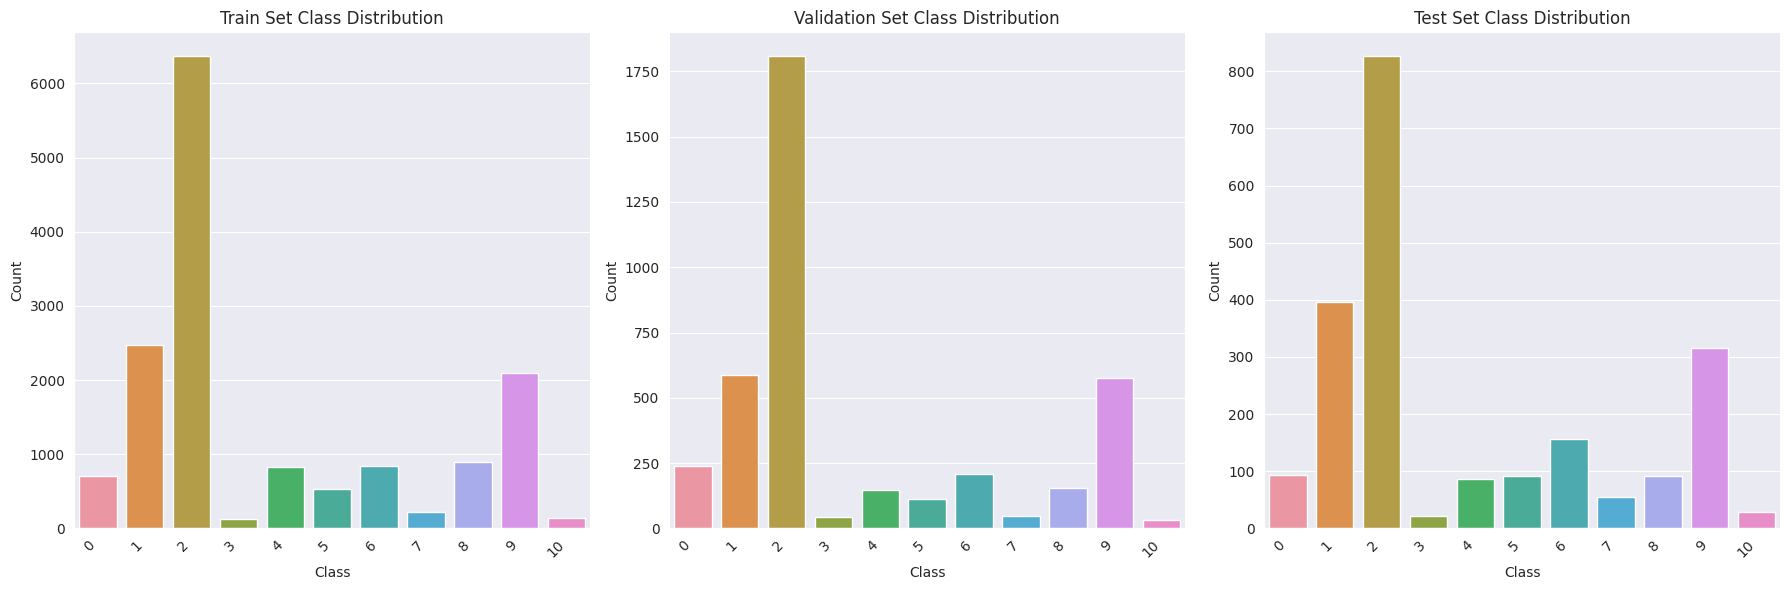

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def parse_yolov8_annotations(annotation_path):
    annotations = []
    with open(annotation_path, 'r') as file:
        for line in file:
            line = line.strip().split()
            class_label = int(line[0])
            annotations.append(class_label)
    return annotations

# Replace these paths with your actual paths
train_path = "/kaggle/input/sr-det/sat-gen-256x256/train/labels/"
valid_path = "/kaggle/input/sr-det/sat-gen-256x256/val/labels/"
test_path = "/kaggle/input/sr-det/sat-gen-256x256/test/labels/"

# Load annotations for train, validation, and test sets
train_annotations = []
valid_annotations = []
test_annotations = []

for file_name in os.listdir(train_path):
    train_annotations.extend(parse_yolov8_annotations(os.path.join(train_path, file_name)))

for file_name in os.listdir(valid_path):
    valid_annotations.extend(parse_yolov8_annotations(os.path.join(valid_path, file_name)))

for file_name in os.listdir(test_path):
    test_annotations.extend(parse_yolov8_annotations(os.path.join(test_path, file_name)))

# Convert to Pandas DataFrame
train_df = pd.DataFrame({'class': train_annotations})
valid_df = pd.DataFrame({'class': valid_annotations})
test_df = pd.DataFrame({'class': test_annotations})

# Plot class distribution for train set
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='class', data=train_df)
plt.title('Train Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot class distribution for validation set
plt.subplot(1, 3, 2)
sns.countplot(x='class', data=valid_df)
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot class distribution for test set
plt.subplot(1, 3, 3)
sns.countplot(x='class', data=test_df)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# Building & Training Model

In [7]:
#disable wandb
import os
os.environ["WANDB_DISABLED"] = "true"

In [8]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/working/data.yaml',
            epochs =120,
            imgsz = 512,
            seed = 42,
            batch = 8,
            workers = 4,
            project='yolo8',  # Specify your project name
            name='result') 

100%|██████████| 131M/131M [00:00<00:00, 286MB/s]


Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/data.yaml, epochs=120, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolo8, name=result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 40.4MB/s]
2024-03-20 23:42:07,895	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-20 23:42:08,775	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-20 23:42:11.085956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 23:42:11.086064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 23:42:11.215603: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

wandb: Tracking run with wandb version 0.16.3
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 159MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/sr-det/sat-gen-256x256/train/labels... 1470 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:03<00:00, 433.13it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/sr-det/sat-gen-256x256/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/sr-det/sat-gen-256x256/val/labels... 420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:01<00:00, 375.96it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/sr-det/sat-gen-256x256/val is not writeable, cache not saved.


Plotting labels to yolo8/result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to yolo8/result
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      6.25G      1.529      2.118       1.14         80        512: 100%|██████████| 184/184 [01:35<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.53it/s]


                   all        420       3958      0.445      0.404      0.373       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      6.67G      1.523      1.592      1.109        112        512: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]


                   all        420       3958      0.593      0.418      0.424      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      6.77G      1.537      1.498      1.147        105        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]


                   all        420       3958      0.627      0.409      0.456      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      6.81G      1.594      1.619      1.158         91        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]


                   all        420       3958      0.437      0.499      0.482      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      6.81G      1.531      1.424      1.137         84        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]


                   all        420       3958      0.595      0.548      0.549      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      6.83G      1.471      1.333       1.11         20        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.84it/s]


                   all        420       3958        0.6      0.577      0.591      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120       6.8G      1.452      1.302      1.107         83        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]


                   all        420       3958      0.597      0.625      0.652       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      6.81G      1.427      1.229      1.095         68        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]


                   all        420       3958      0.669      0.562       0.63      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      6.87G      1.427      1.227      1.081        128        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]


                   all        420       3958      0.633      0.628      0.652      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      6.81G      1.375      1.156       1.07         47        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958       0.69      0.627      0.681      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      6.81G      1.373      1.146      1.078         67        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.642      0.647      0.661      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      6.81G      1.361      1.121      1.053        103        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]


                   all        420       3958      0.636      0.674      0.684      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120       6.8G      1.325      1.076      1.056        100        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]


                   all        420       3958      0.706      0.663      0.703      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      6.86G      1.333      1.065      1.048        162        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.697      0.711       0.73      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120       6.8G      1.317      1.017      1.042         87        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]


                   all        420       3958      0.656      0.698      0.711      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120       6.8G      1.294      1.035      1.037        101        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]


                   all        420       3958      0.731      0.712      0.742      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      6.79G      1.304      1.003      1.036         96        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]


                   all        420       3958      0.675       0.74      0.738      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      6.79G      1.276      0.959      1.024         75        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.738      0.717      0.756      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      6.85G       1.27     0.9746      1.021         40        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.702      0.745      0.772      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      6.81G      1.283     0.9877      1.031         52        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]

                   all        420       3958      0.677      0.747      0.737      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120       6.8G      1.239      0.926      1.012         52        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.724      0.752      0.762      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      6.85G       1.24     0.9108      1.017         79        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.715      0.753      0.749      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      6.79G      1.216     0.9092      1.002         96        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.777      0.695      0.768       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      6.79G      1.212     0.9106     0.9975         70        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.743      0.723      0.767      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120       6.8G       1.23     0.9163      1.007         85        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.723      0.713      0.769      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      6.82G      1.223     0.8707      1.004         63        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.785      0.719      0.781      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      6.79G      1.201     0.8699      1.006         44        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.768      0.748      0.792      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      6.85G      1.194     0.8719      1.001         79        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.778      0.754      0.803      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120       6.8G      1.196     0.8691     0.9903         59        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.736      0.779      0.782      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120       6.8G      1.196     0.8457     0.9901         50        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.733      0.762      0.782      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      6.78G      1.185     0.8512     0.9891         79        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.775      0.759      0.809      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      6.83G      1.189     0.8271      0.985        176        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.764      0.768      0.791      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      6.82G       1.16     0.8045     0.9856         84        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.783      0.773       0.82      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      6.81G      1.168     0.8212      0.978         69        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.736      0.784      0.796      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      6.85G      1.151     0.7885      0.978         66        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.736      0.797      0.799      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      6.78G      1.135     0.7788     0.9748        119        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.762      0.779      0.807      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120       6.8G      1.139      0.791     0.9753        110        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.767      0.761      0.804      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      6.79G      1.131     0.7824     0.9661        102        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.754      0.776      0.793      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120       6.8G       1.11     0.7647      0.965        118        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.778       0.77      0.801      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      6.83G      1.123     0.7524     0.9649        119        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.83it/s]

                   all        420       3958      0.767      0.803      0.818      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120       6.8G      1.118     0.7539     0.9661         91        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.794      0.774      0.815      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      6.83G      1.093     0.7214     0.9658        113        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.767      0.806       0.82      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      6.79G      1.102     0.7381      0.957         81        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.772      0.771      0.815      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      6.78G      1.114     0.7511     0.9632        177        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.778      0.784      0.807      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120       6.8G      1.088     0.7225     0.9622         63        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.781      0.798      0.822      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120       6.8G      1.081      0.708     0.9581         83        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.786      0.802      0.833      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      6.81G      1.074     0.6888     0.9527         71        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]

                   all        420       3958      0.759      0.794       0.82      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120       6.8G      1.076     0.7056      0.951         61        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.797      0.785      0.833       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      6.81G      1.069     0.7004     0.9508        109        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958       0.78      0.785       0.83        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      6.81G      1.069     0.6884     0.9456         40        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.785      0.803      0.836      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      6.79G      1.063     0.6951     0.9465         66        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.803      0.802      0.837      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      6.79G      1.053     0.6814     0.9443         60        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.775      0.813       0.84      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      6.78G      1.048     0.6792     0.9523         62        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958       0.78      0.824      0.837      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120       6.8G      1.031      0.658     0.9414         60        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.816       0.77      0.821      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      6.84G      1.042     0.6608      0.939         69        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.788      0.809      0.841      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      6.86G      1.022     0.6436     0.9343         66        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.808      0.803      0.848      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      6.81G      1.019     0.6473     0.9468         89        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.791      0.802      0.845       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120       6.8G       1.02     0.6542     0.9368         90        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]

                   all        420       3958      0.816       0.79      0.846      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120       6.8G      1.033     0.6492     0.9366        120        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.807      0.797       0.84      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      6.79G      1.007      0.621     0.9366         68        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.804      0.812      0.836      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      6.79G      1.007     0.6238     0.9284         73        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]

                   all        420       3958      0.767      0.826      0.831      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      6.78G      1.017     0.6343     0.9322         60        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.782      0.823      0.846      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120       6.8G      1.009     0.6165     0.9279        134        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.796      0.824      0.849      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      6.82G          1       0.62     0.9249         39        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.827      0.807       0.85      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      6.79G       1.01     0.6143      0.932         89        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958       0.81       0.82      0.855      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120       6.8G      0.999     0.6067     0.9321         73        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.823      0.793      0.848      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      6.83G     0.9872     0.6005     0.9279         46        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958       0.81      0.824      0.848      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      6.78G     0.9819      0.587     0.9297         49        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.806      0.837      0.856      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120       6.8G     0.9603     0.5768      0.917         43        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.801      0.815      0.845      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120       6.8G     0.9789     0.5887     0.9251         36        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.813      0.826      0.855      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      6.78G     0.9592     0.5704     0.9136        102        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.817      0.832      0.861      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      6.79G     0.9734     0.5842     0.9255         43        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.815      0.823      0.849      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      6.79G     0.9674      0.577     0.9128         98        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.801      0.829      0.856      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120       6.8G      0.963     0.5728      0.921         87        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.811      0.823      0.859       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      6.79G     0.9557     0.5685      0.912        178        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958       0.82      0.824      0.853      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      6.81G      0.948     0.5599     0.9106         70        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.819       0.82      0.856      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      6.81G     0.9388     0.5543     0.9142         84        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.821      0.817      0.851      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      6.81G     0.9479     0.5529     0.9142         69        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.805      0.825      0.848      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120       6.8G     0.9347     0.5494     0.9071         64        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.796      0.837      0.849      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      6.81G     0.9257     0.5405     0.9068         79        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.815      0.811      0.849      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120       6.8G     0.9232      0.539      0.911         54        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.784      0.846      0.857      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      6.81G       0.91     0.5266     0.9062         99        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.834      0.804      0.864      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      6.79G     0.9172     0.5309     0.9018         37        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958       0.81      0.834      0.864      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120       6.8G     0.9074     0.5231     0.9066        239        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.86it/s]

                   all        420       3958      0.809      0.843      0.858      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      6.79G     0.9141     0.5249     0.9046         58        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958       0.82      0.834      0.855      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      6.81G     0.8903     0.5138     0.9041        146        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.833      0.811      0.853      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120       6.8G     0.8913     0.5114     0.8933         88        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.811       0.83      0.854      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      6.81G     0.8804     0.4998     0.8955         53        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.817      0.823      0.861      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      6.84G      0.891     0.5073     0.8999         75        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.803      0.828      0.859      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      6.82G     0.8756     0.4982     0.9043        123        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.803      0.824      0.859      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      6.79G     0.8581     0.4819     0.8932         66        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.838      0.821      0.864      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      6.81G     0.8767     0.4954     0.8964         63        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.828      0.811      0.856      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120       6.8G      0.865      0.485     0.8955         44        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.804      0.833       0.86      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      6.79G     0.8623     0.4845     0.8919         97        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.792      0.844      0.861      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      6.84G     0.8549     0.4798     0.8857        119        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.811       0.83      0.847      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120       6.8G     0.8697     0.4785     0.8915        147        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958        0.8      0.846      0.862      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120       6.8G       0.84     0.4715     0.8936         65        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.821      0.838      0.868       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120       6.8G     0.8385     0.4739     0.8929        119        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.812      0.844      0.865      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      6.81G     0.8289     0.4684     0.8904         27        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.796      0.854      0.852      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      6.81G      0.836     0.4682     0.8858         94        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.811      0.845      0.866      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120       6.8G     0.8366     0.4662     0.8835         77        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.804      0.839      0.855      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      6.86G     0.8368     0.4623     0.8822         76        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.826      0.835      0.868      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      6.84G     0.8218      0.454     0.8799         81        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.811      0.835       0.86      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      6.81G      0.822     0.4558     0.8898        103        512: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.831      0.829       0.86      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      6.84G     0.8246     0.4553     0.8852        135        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.831      0.823      0.865      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      6.85G     0.8203     0.4517     0.8822         49        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.805      0.835      0.866      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      6.81G     0.8027     0.4438     0.8822         71        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.838      0.813      0.867      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      6.79G     0.8061     0.4438     0.8769         24        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.824      0.828      0.864      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      6.79G     0.7951     0.4358     0.8768         74        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.808      0.846      0.868      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      6.84G     0.8003     0.4362     0.8741         55        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.806      0.845      0.869      0.664


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      6.79G     0.7875     0.4182     0.8718         45        512: 100%|██████████| 184/184 [01:32<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        420       3958      0.815      0.828      0.861      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120       6.8G     0.7652     0.3983     0.8651         41        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.796      0.848      0.861      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120       6.8G     0.7585     0.3926     0.8589         80        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.832      0.823      0.868      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      6.79G     0.7587     0.3951     0.8696         83        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.822      0.826      0.868      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      6.81G      0.746     0.3873     0.8593         62        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.853      0.805      0.871      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      6.79G     0.7541      0.392     0.8659         38        512: 100%|██████████| 184/184 [01:30<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.844      0.812      0.869      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120       6.8G     0.7367     0.3808     0.8573         12        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.822      0.825      0.869      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      6.81G     0.7415     0.3822     0.8599         44        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]

                   all        420       3958      0.833      0.814      0.868      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      6.77G     0.7333       0.38     0.8545         25        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        420       3958      0.795      0.848      0.867      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120       6.8G      0.749     0.3861       0.86         29        512: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]

                   all        420       3958      0.797      0.849      0.867      0.667



120 epochs completed in 3.498 hours.
Optimizer stripped from yolo8/result/weights/last.pt, 136.7MB
Optimizer stripped from yolo8/result/weights/best.pt, 136.7MB

Validating yolo8/result/weights/best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68134161 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:16<00:00,  1.67it/s]


                   all        420       3958      0.833      0.814      0.868      0.668
              airplane        420        240      0.933      0.946      0.973      0.779
                  boat        420        587      0.945      0.842      0.921      0.674
                   car        420       1809      0.849      0.623      0.775      0.467
            cargo ship        420         44      0.861      0.864      0.917      0.815
           fighter jet        420        145      0.935      0.966      0.957      0.748
            helicopter        420        114      0.947      0.946      0.963       0.68
                   jet        420        207      0.887      0.907      0.935      0.748
     military aircraft        420         48      0.828      0.805      0.901      0.781
       propeller plane        420        154      0.687      0.844      0.872      0.646
                 truck        420        577      0.695       0.43      0.525      0.343
                 yach

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▃▅▅▆▆▇▆▇▇▇▇▇▇▇▇▇███████████████████████
wandb:     metrics/mAP50-95(B) ▁▂▄▅▅▅▆▅▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇██▇▇█████████████
wandb:    metrics/precision(B) ▁▁▄▅▆▆▆▆▆▇▇▆▇▇▇▇▇▇▇█▇▇▇█▇██▇█▇█▇▇▇██▇███
wandb:       metrics/recall(B) ▁▃▅▅▅▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇██████▇█▇█▇████▇██▇█
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ▇█▇▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
wandb:          train/cls_loss █▆▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss ██▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:            val/box_loss ██▇▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▂▂▁▁▁▁▁

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c249bd4d780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

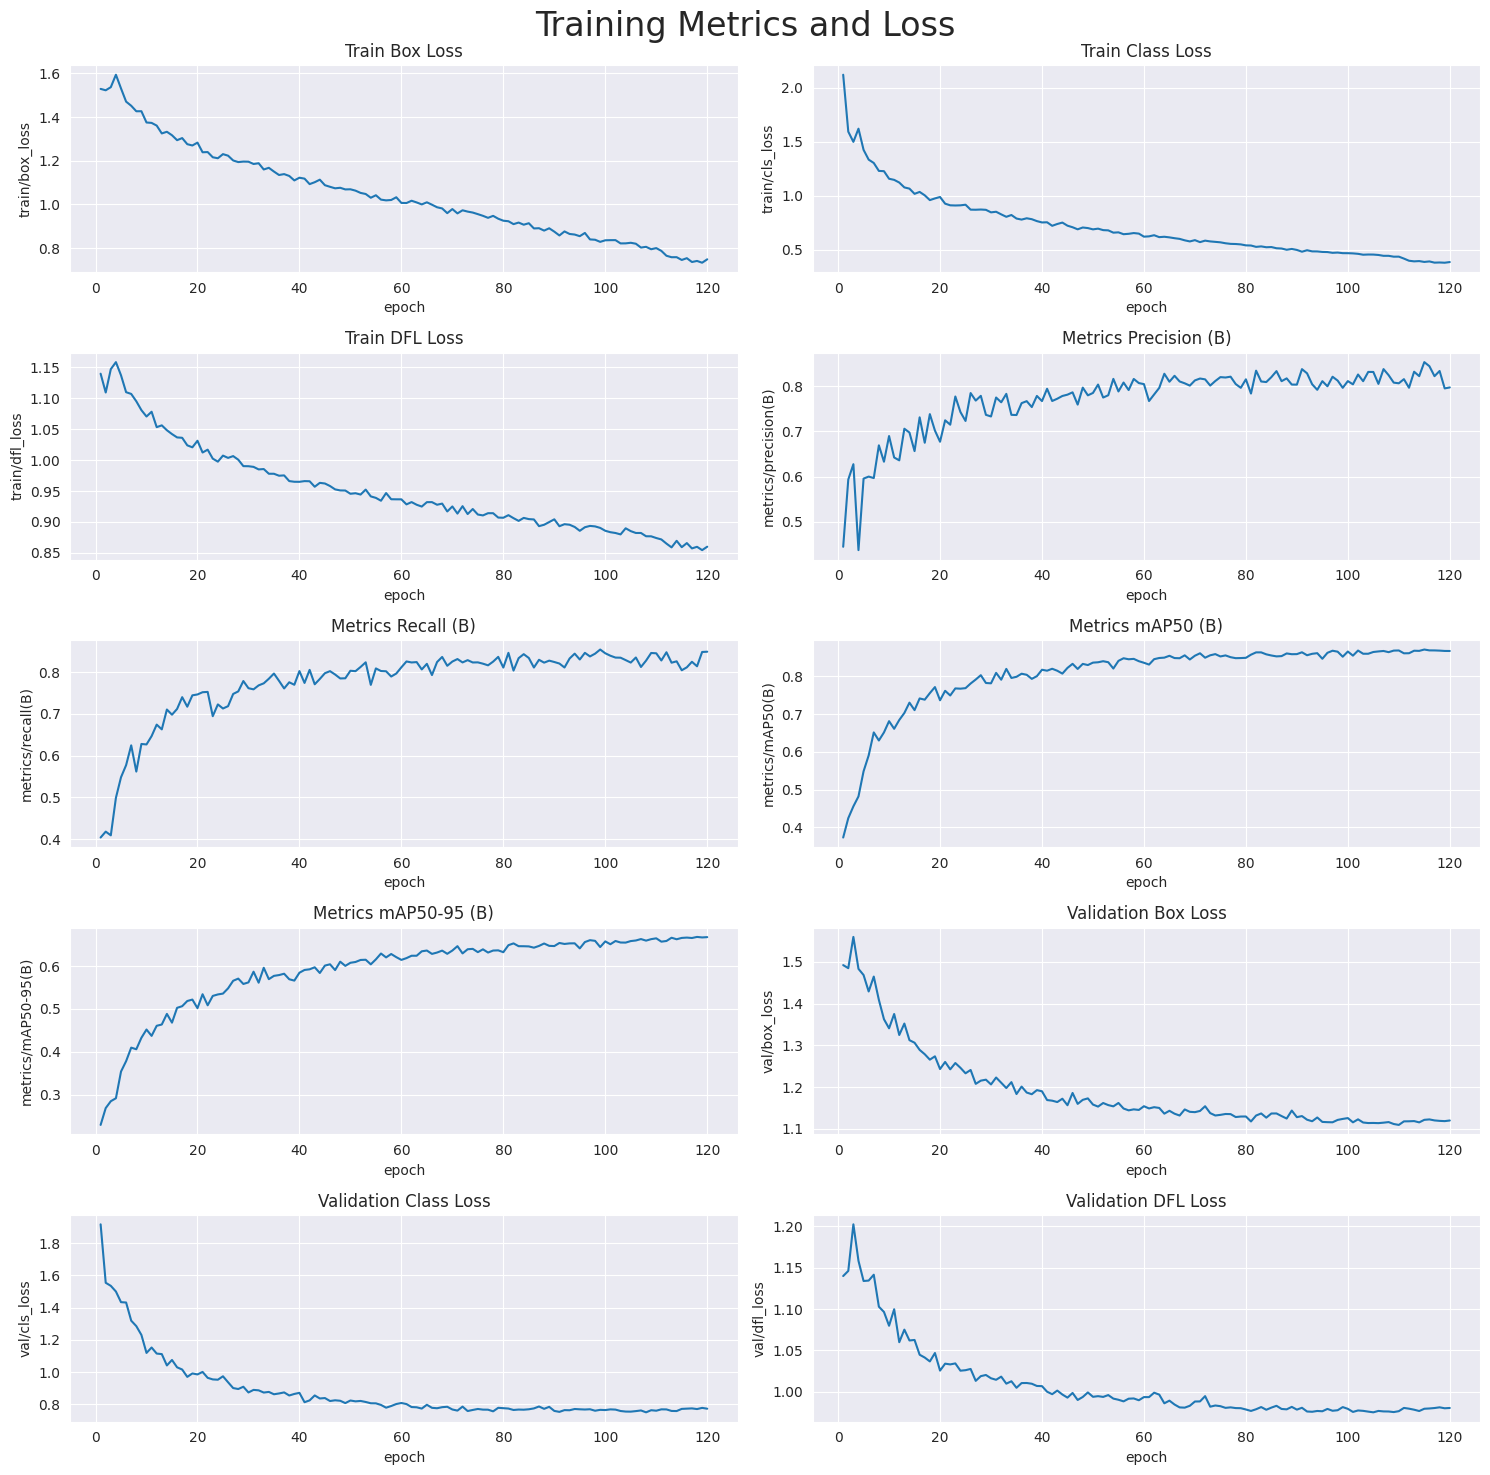

In [9]:
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/yolo8/result/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# Results

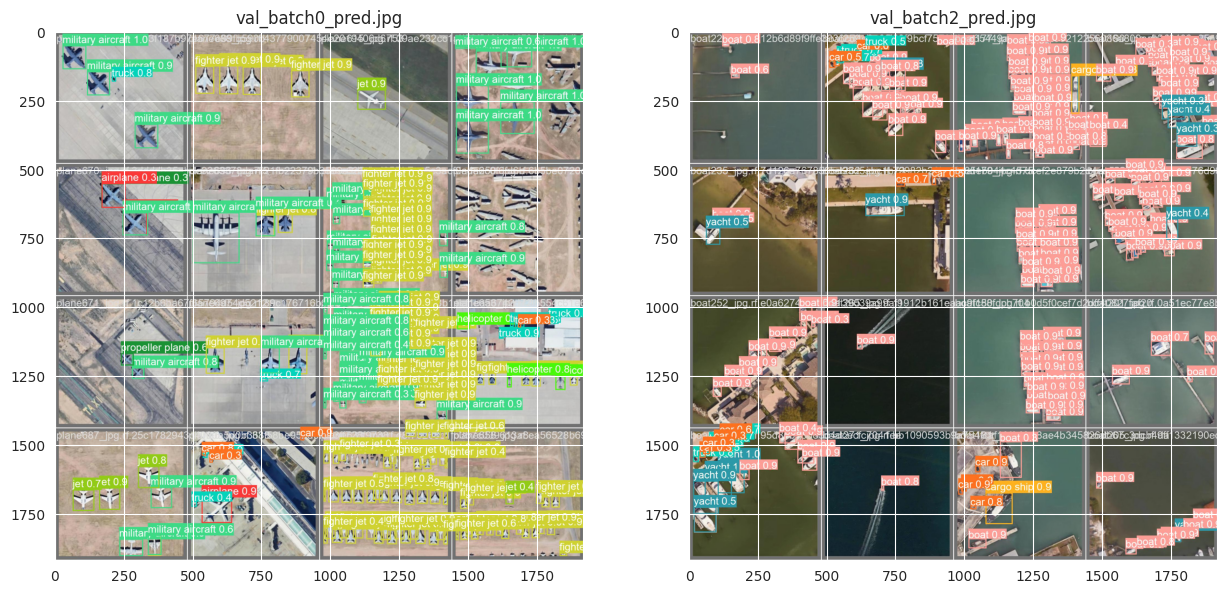

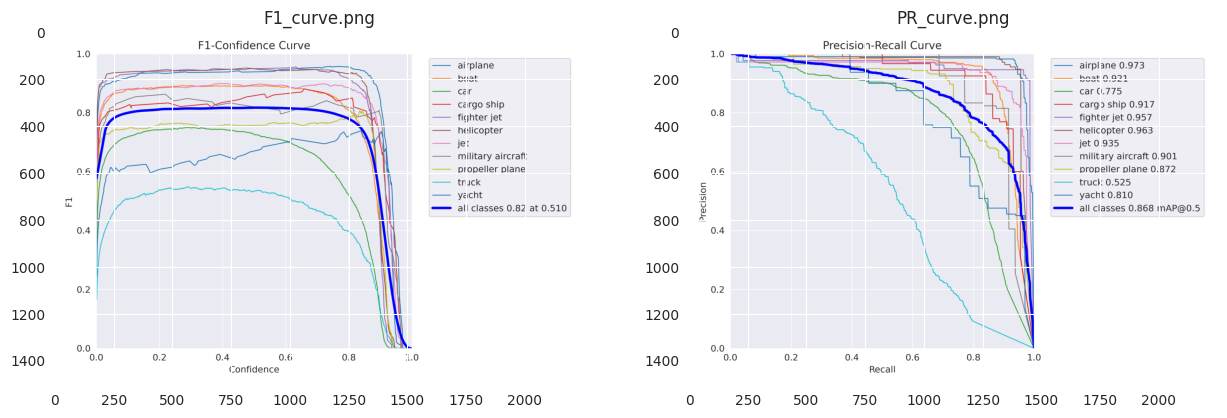

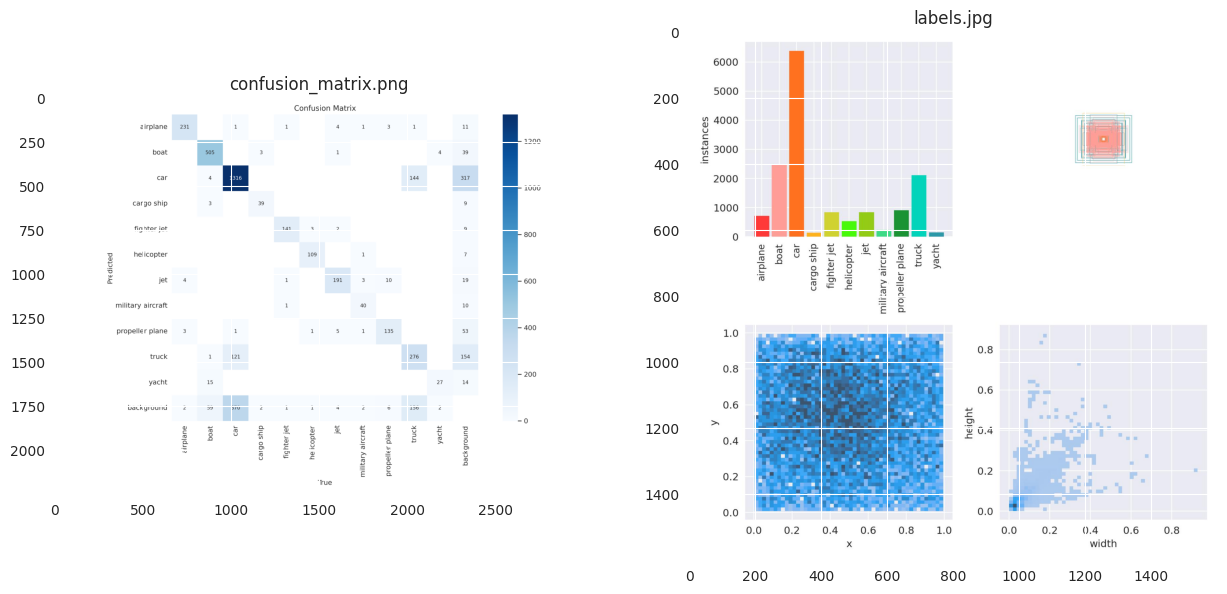

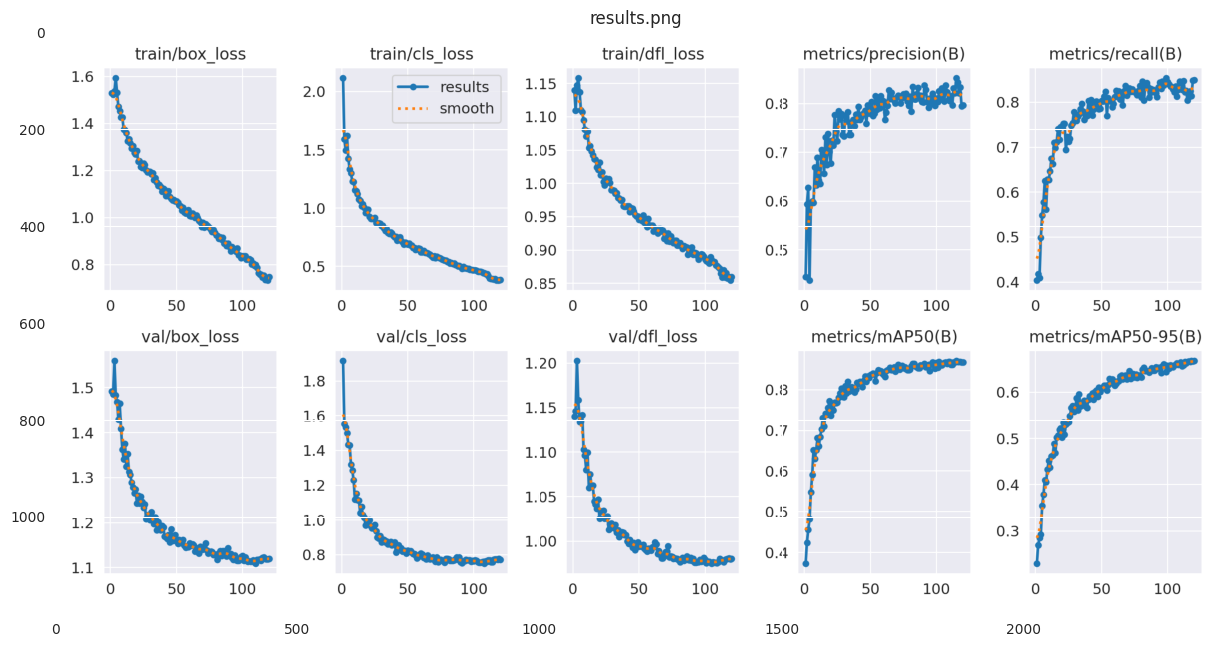

In [10]:
model_path = '/kaggle/working/yolo8/result/'

def plot(ls, size):
    c = 1
    plt.figure(figsize=(15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        img = plt.imread(model_path + im)
        plt.imshow(img)
        plt.title(im)
        c += 1
    plt.show()

# Visualize images and plots
plot(['val_batch0_pred.jpg', 'val_batch2_pred.jpg'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png', 'labels.jpg'], (1, 2))
plot(['results.png'], (1, 1))


# Prediction

In [11]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 512x512 18 boats, 25.4ms
Speed: 2.0ms preprocess, 25.4ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 boat, 25.3ms
Speed: 2.2ms preprocess, 25.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 8 jets, 1 propeller plane, 25.3ms
Speed: 2.2ms preprocess, 25.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 boats, 1 cargo ship, 1 yacht, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 7 boats, 9 yachts, 23.5ms
Speed: 1.6ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 boat, 23.5ms
Speed: 1.6ms preprocess, 23.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 airplanes, 4 trucks, 23.2ms
Speed: 1.9ms preprocess, 23.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 4 cars, 2 helicopters, 3 trucks, 23.3ms
Speed: 1.

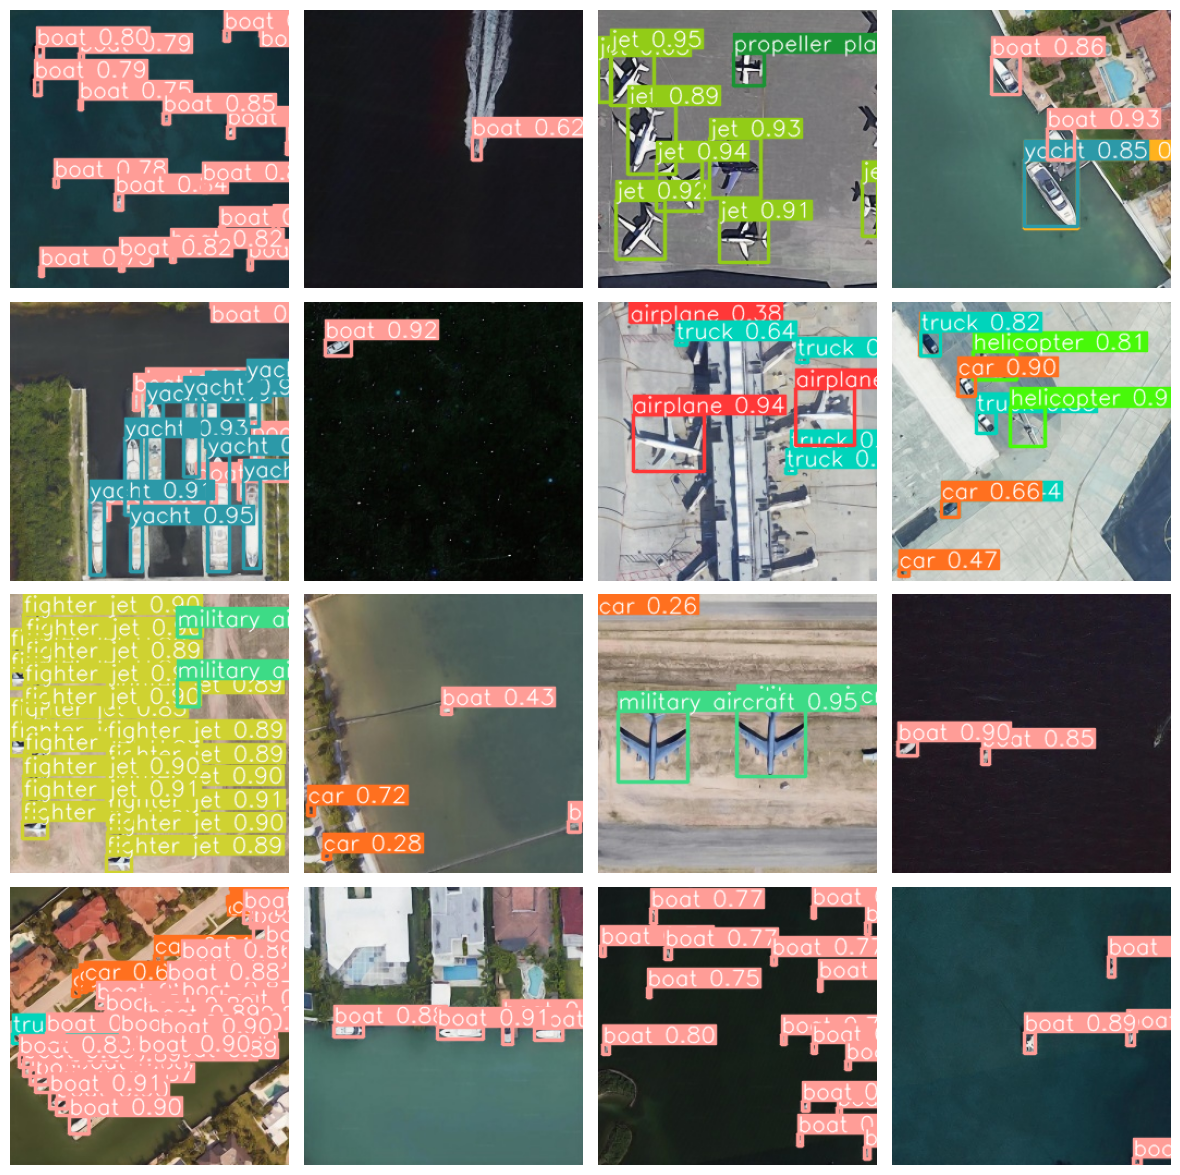

In [12]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/sr-det/sat-gen-256x256/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)